In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset



--- 
 - nn.Module로 구현하는 로지스틱 회귀 
 
 - 잠깐만 복습을 해보면 선형 회귀 모델의 가설식은 H(x)=Wx+b이었습니다. 
 - 그리고 이 가설식을 구현하기 위해서 파이토치의 nn.Linear()를 사용했습니다. 
 - 그리고 로지스틱 회귀의 가설식은 H(x)=sigmoid(Wx+b)입니다. 



model : 
    Sequential(
      (0): Linear(in_features=2, out_features=1, bias=True)
      (1): Sigmoid()
    ) 
    0.weight    torch.Size([1, 2])
        tensor([[ 0.3643, -0.3121]])
    0.bias    torch.Size([1])
        tensor([-0.1371])

model(x_train) : 
    torch.Size([6, 1]) tensor([[0.4020],
            [0.4147],
            [0.6556],
            [0.5948],
            [0.6788],
            [0 ...

-------------------------------------------------------------------------------- 
epoch :    0/1000 
cost : 0.539713 
accuracy : 0.83 

-------------------------------------------------------------------------------- 
epoch :  100/1000 
cost : 0.134272 
accuracy : 1.00 

-------------------------------------------------------------------------------- 
epoch :  200/1000 
cost : 0.080486 
accuracy : 1.00 

-------------------------------------------------------------------------------- 
epoch :  300/1000 
cost : 0.057820 
accuracy : 1.00 

----------------------------------------------

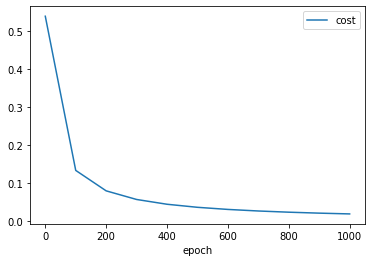

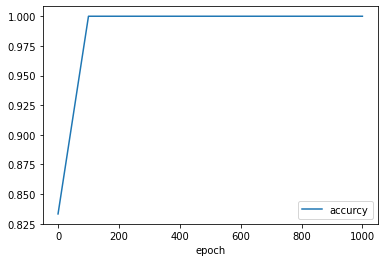

In [2]:

# - 파이토치에서는 nn.Sigmoid()를 통해서 시그모이드 함수를 구현하므로
# - 결과적으로 nn.Linear()의 결과를 nn.Sigmoid()를 거치게하면
# - 로지스틱 회귀의 가설식이 됩니다.
#
# - 파이토치를 통해 이를 구현해봅시다.

multi_lines = """
# - 파이토치에서는 nn.Sigmoid()를 통해서 시그모이드 함수를 구현하므로
# - 결과적으로 nn.Linear()의 결과를 nn.Sigmoid()를 거치게하면
# - 로지스틱 회귀의 가설식이 됩니다.
"""

lineArray = multi_lines.splitlines()

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

mu.log("model", model)
mu.log("model(x_train)", model(x_train))

optimizer = optim.SGD(model.parameters(), lr=1)
nb_epoches = 1000

plt_epoch = []
plt_accuracy = []
mu.plt_init()

for epoch in range(nb_epoches + 1):
    hypothesis = model(x_train)
    cost = F.binary_cross_entropy(hypothesis, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        accuracy = mu.get_binary_classification_accuracy(hypothesis, y_train)
        mu.log_epoch(epoch, nb_epoches, cost, accuracy)
        plt_epoch.append(epoch)
        plt_accuracy.append(accuracy)

mu.plt_show()